In [1]:
# Predicting heart diseases using machine learning

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


In [2]:
data = pd.read_csv("heart-disease.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.shape

(303, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
# Checking target values
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot: >

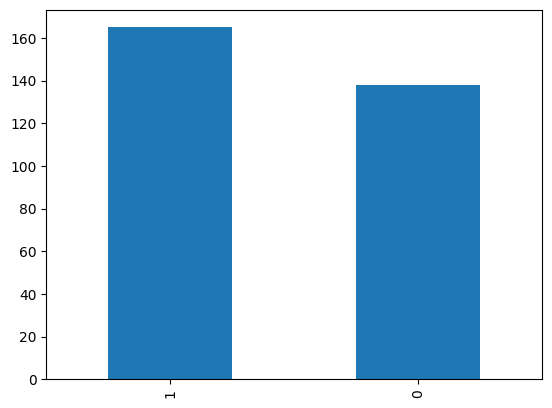

In [7]:
data['target'].value_counts().plot(kind='bar')

In [8]:
# Checking missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# Heart disease frequency according to sex
data.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
# Compare target column with sex column
pd.crosstab(data.target, data.sex)

sex,0,1
target,,
0,24,114
1,72,93


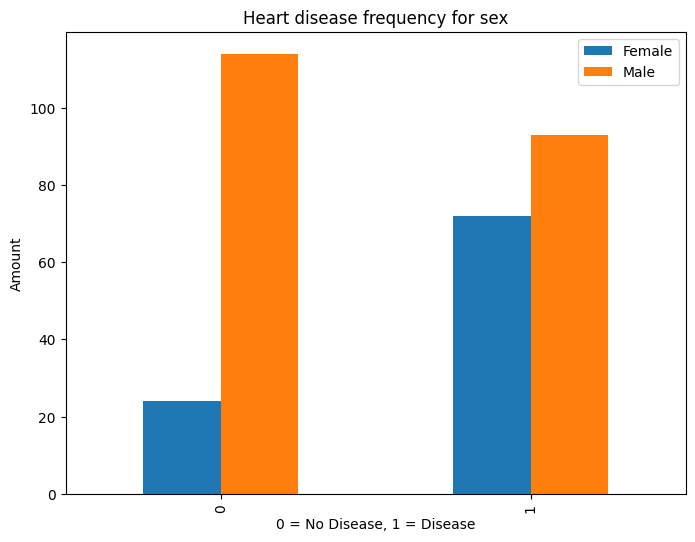

In [11]:
pd.crosstab(data.target, data.sex).plot(kind='bar',
                                        figsize=(8,6))
plt.title("Heart disease frequency for sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(['Female', 'Male'])
plt.show()

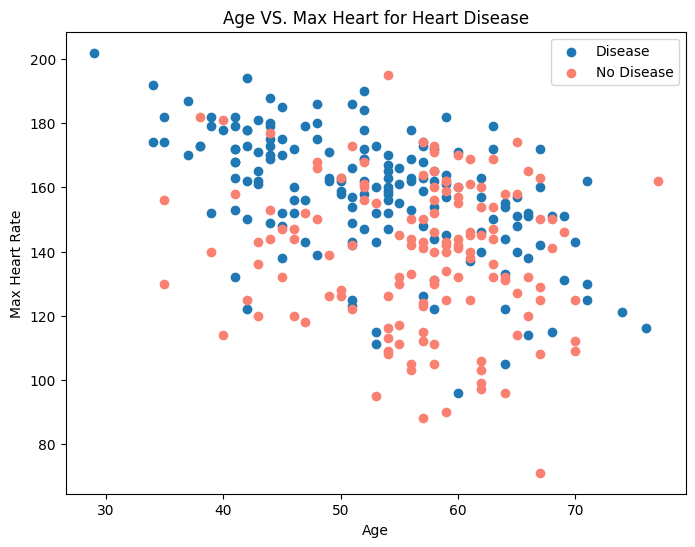

In [12]:
# Age VS. Max Heart for Heart Disease

# Scatter with positive example
plt.figure(figsize=(8,6))
plt.scatter(data.age[data.target==1],
            data.thalach[data.target==1])

# Scatter with negative example
plt.scatter(data.age[data.target==0],
            data.thalach[data.target==0],
            c="salmon")

plt.title("Age VS. Max Heart for Heart Disease")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"])

<AxesSubplot: xlabel='age', ylabel='Count'>

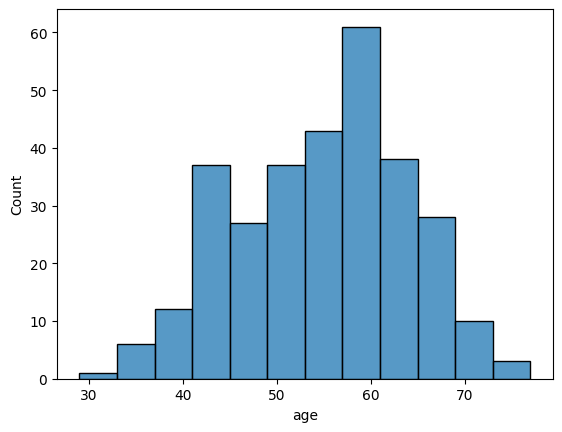

In [13]:
# Check the distribution of the age column with histogram
sns.histplot(data["age"])

In [14]:
# Heart pain Disease per Chest Pain Type
pd.crosstab(data.cp, data.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


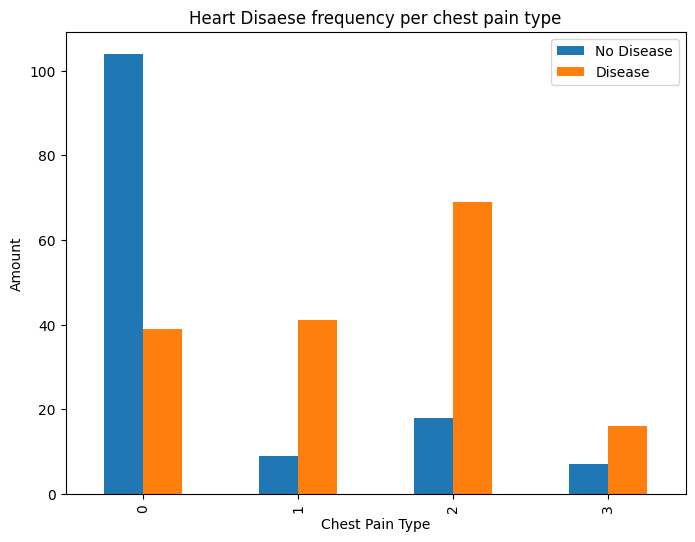

In [15]:
pd.crosstab(data.cp, data.target).plot(kind='bar', figsize=(8,6))
plt.title("Heart Disaese frequency per chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])

<AxesSubplot: >

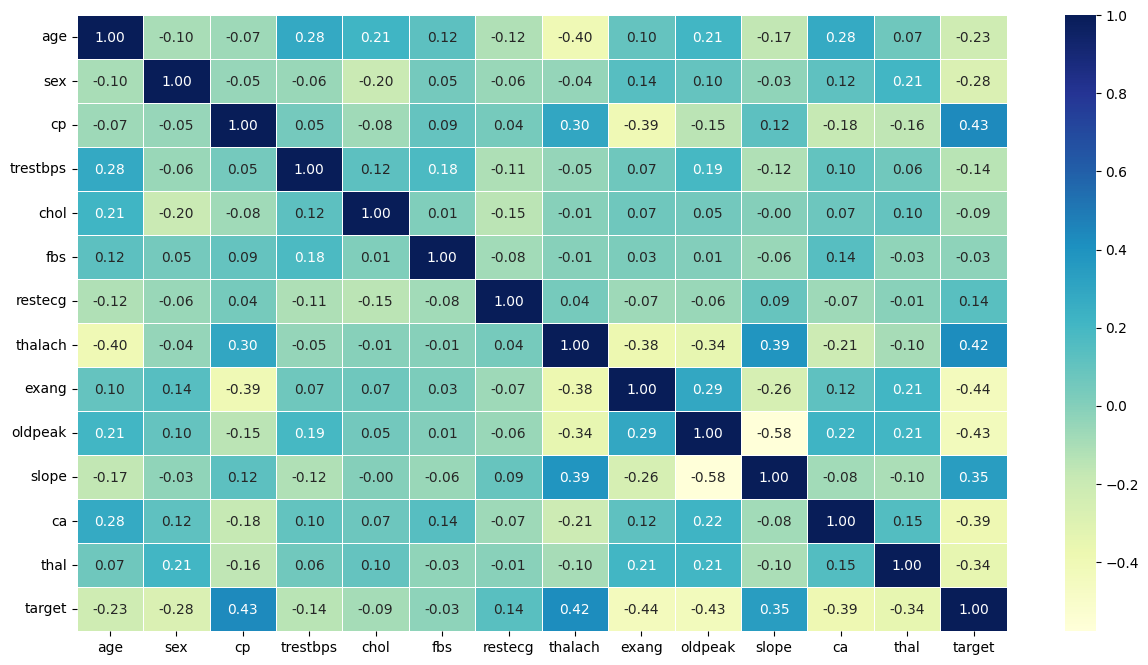

In [16]:
# correlation matrix
corr_matrix = data.corr()

plt.figure(figsize = (15,8))
sns.heatmap(corr_matrix,
            annot=True, 
            linewidths=0.5,
            fmt=".2f",
            cmap="YlGnBu")

# Modelling

In [17]:
# Split Data Into X and y

X = data.drop("target", axis=1)
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [18]:
# Put Models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()
}

# Create a function to fit score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluate given machine learning models
    '''
    np.random.seed(42)
    model_scores ={}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores


In [19]:
model_scores = fit_and_score(models = models,
                            X_train = X_train,
                            X_test = X_test,
                            y_train = y_train,
                            y_test = y_test)
model_scores

{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.6229508196721312,
 'Random Forest': 0.819672131147541}

In [20]:
# Hyperparameter tuning

train_scores = []
test_scores = []
neighbors = range(1, 51)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

Maximun KNN score on the test date: 67.21%


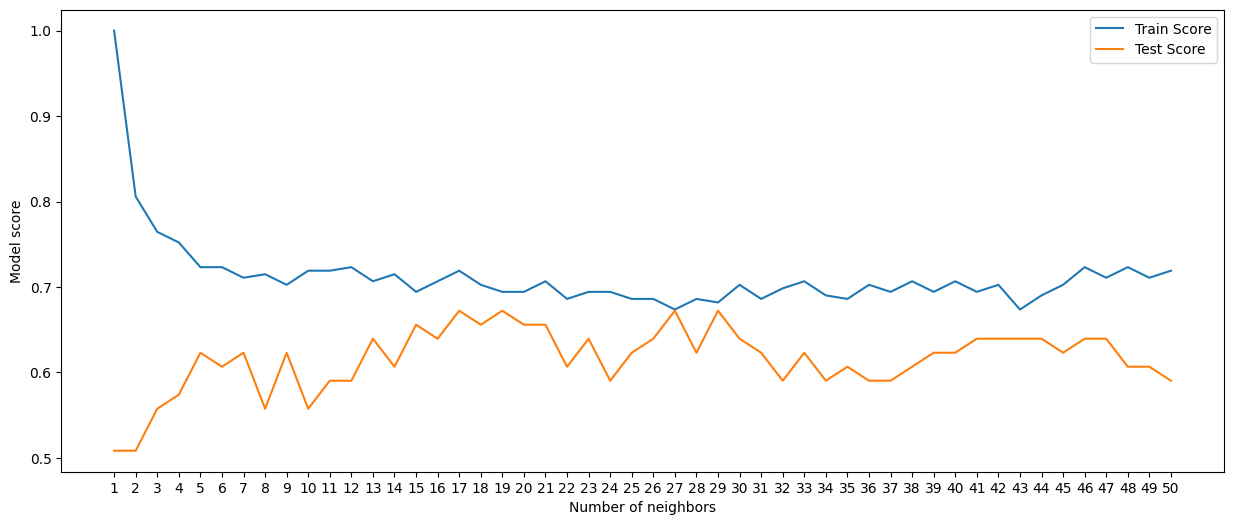

In [21]:
plt.figure(figsize=(15,6))
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1, 51, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximun KNN score on the test date: {max(test_scores)*100:.2f}%")

In [22]:
# Hyperparameter tuning with RandomizedSearchCV

log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ["liblinear"]}

rf_grid = {'n_estimators': np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

In [23]:
# Tuning LogisticRegression

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose = True)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [24]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [25]:
rs_log_reg.score(X_test, y_test)

0.8524590163934426

In [26]:
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [27]:
rs_rf.best_params_

{'n_estimators': 110,
 'min_samples_split': 2,
 'min_samples_leaf': 17,
 'max_depth': 3}

In [28]:
rs_rf.score(X_test, y_test)

0.8852459016393442

In [29]:
# hyperparameter tuning using GridSearchCV
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv=5,
                          verbose = True)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [30]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [33]:
gs_log_reg.score(X_test, y_test)

0.8524590163934426

In [34]:
y_preds = gs_log_reg.predict(X_test)

In [35]:
# Classification Matrix

confusion_matrix(y_test, y_preds)

array([[18,  7],
       [ 2, 34]], dtype=int64)

<AxesSubplot: >

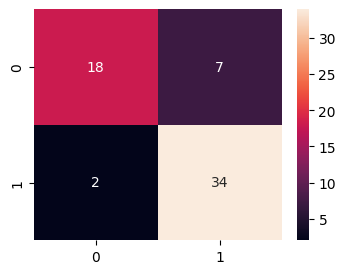

In [45]:
plt.subplots(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True)

In [47]:
# Classification report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80        25
           1       0.83      0.94      0.88        36

    accuracy                           0.85        61
   macro avg       0.86      0.83      0.84        61
weighted avg       0.86      0.85      0.85        61



In [63]:
# Cross Validity Accuracy

cv_acc = cross_val_score(gs_log_reg, X, y, cv=5, scoring="accuracy")
np.mean(cv_acc)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8446448087431694

In [62]:
# Cross validate Precision

cv_pre = cross_val_score(gs_log_reg, X, y, cv=5, scoring="precision")
np.mean(cv_pre)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8207936507936507

In [64]:
# Cross validate Recall

cv_recall = cross_val_score(gs_log_reg, X, y, cv=5, scoring="recall")
np.mean(cv_recall)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.9212121212121213

In [65]:
# cross validate f1-score

cv_f1 = cross_val_score(gs_log_reg, X, y, cv=5, scoring="f1")
np.mean(cv_f1)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8673007976269721

In [67]:
# Feature Importance

clf = LogisticRegression(C = 0.23357214690901212, solver = 'liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [68]:
clf.coef_

array([[ 0.00101304, -0.89971834,  0.70241496, -0.00893517, -0.00164758,
        -0.15251178,  0.24055373,  0.02592875, -0.57622521, -0.55737346,
         0.27998745, -0.58694665, -0.69307784]])

In [71]:
feature_dict = dict(zip(data.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0010130360289436916,
 'sex': -0.8997183427613376,
 'cp': 0.702414958788206,
 'trestbps': -0.008935168207671701,
 'chol': -0.0016475779138914516,
 'fbs': -0.15251177967615517,
 'restecg': 0.240553728230819,
 'thalach': 0.02592874769894238,
 'exang': -0.5762252107568957,
 'oldpeak': -0.5573734563580085,
 'slope': 0.2799874460975853,
 'ca': -0.5869466542612054,
 'thal': -0.6930778428945589}

<AxesSubplot: title={'center': 'Feature Importance'}>

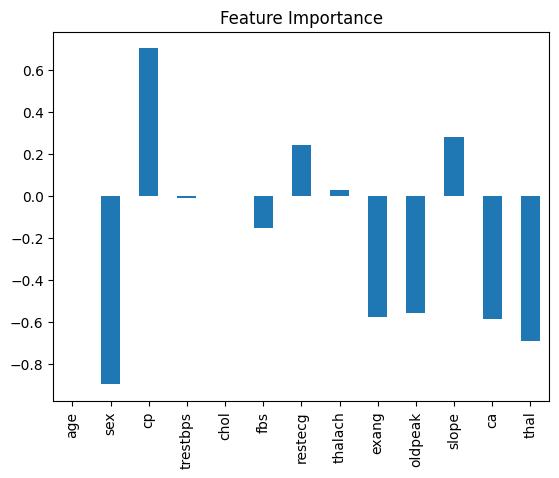

In [77]:
feature_data = pd.DataFrame(feature_dict, index=[0])
feature_data.T.plot.bar(title = "Feature Importance", legend=False)